# Simple Distribution Compare

This notebook shows a simple approach to compare two probability distributions by comparing their CDFs. The approach is inspired by the [Kuiper's test](https://en.wikipedia.org/wiki/Kuiper%27s_test) and [Kolmogorov Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)

The input for the comparison are two iterables with numbers drawn from the two distributions to be compared.

The comparison returns a number between 0 and 1, where 0 means the two distributions are completely the same, and 1 means the two distributions are completely different.

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
def compare_distributions(x1, x2):
    assert len(x1) > 100 and len(x2) > 100
    x1 = np.array(sorted(x1))
    x2 = np.array(sorted(x2))
    n1, n2 = len(x1), len(x2)
    indexes1 = (np.linspace(0, n1, 100, False)[1:]).astype(int)
    indexes2 = (np.linspace(0, n2, 100, False)[1:]).astype(int)
    minmaxval = min(x1[indexes1[-1]], x2[indexes2[-1]])
    mins = np.minimum(x1[indexes1], x2[indexes2])
    diffs = np.abs(np.minimum(minmaxval, x1[indexes1]) - np.minimum(minmaxval, x2[indexes2]))
    maxdiffs = np.abs(minmaxval - mins)
    c = np.sum(diffs) / np.sum(maxdiffs)
    
    fix, ax = subplots(1, 2, figsize=(10, 4))
    mn, mx = min(x1[indexes1[0]], x2[indexes2[0]]), minmaxval
    ax[0].plot(x1, np.linspace(0, 1, len(x1)))
    ax[0].plot(x2, np.linspace(0, 1, len(x2)))
    ax[0].set_xlim(mn, mx)
    ax[1].hist(x1, 80, range=(mn, mx), histtype='step', normed=True)
    ax[1].hist(x2, 80, range=(mn, mx), histtype='step', normed=True)
    
    return c
        

0.0018081889283122782

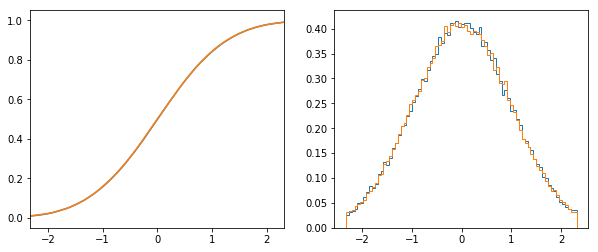

In [9]:
compare_distributions(np.random.normal(0, 1, 100000), np.random.normal(0, 1, 100000))

0.41438519117316464

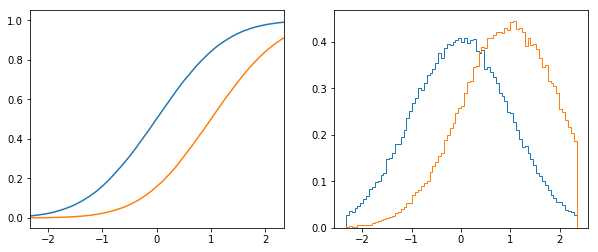

In [11]:
compare_distributions(np.random.normal(0, 1, 100000), np.random.normal(1, 1, 100000))

0.20408163265306123

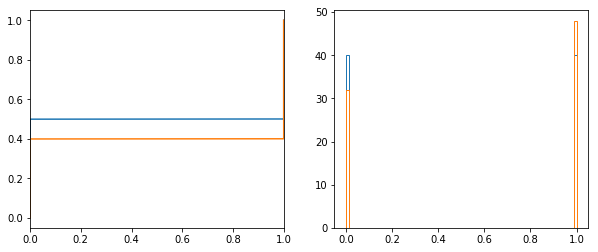

In [16]:
compare_distributions(
    list(np.zeros(500)) + list(np.ones(500)),
    list(np.zeros(400)) + list(np.ones(600))
)

0.30822116642493635

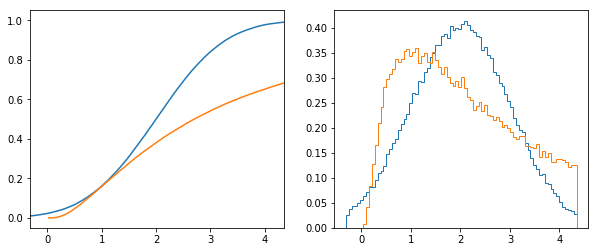

In [14]:
compare_distributions(np.random.normal(2, 1, 100000), np.random.lognormal(1, 1, 100000))

0.10680933125296813

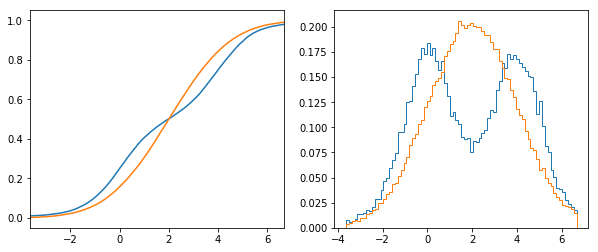

In [15]:
compare_distributions(list(np.random.normal(0, 1, 10000)) + list(np.random.normal(2,3,10000)) + list(np.random.normal(4,1,10000)), np.random.normal(2, 2, 100000))

0.22424911804286099

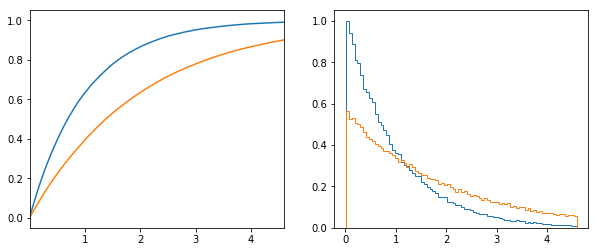

In [17]:
compare_distributions(np.random.exponential(1, 100000), np.random.exponential(2, 100000))

0.87216560226540507

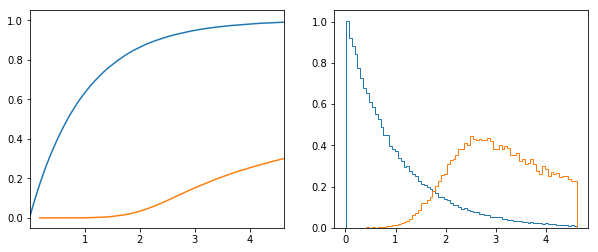

In [21]:
compare_distributions(np.random.exponential(1, 100000), np.random.lognormal(2, 2, 100000) + np.random.normal(2, 0.5, 100000))

0.72639641914227782

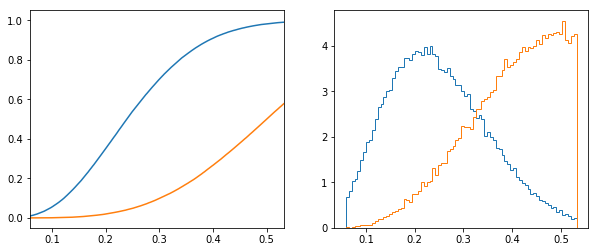

In [23]:
compare_distributions(np.random.beta(4, 12, 100000), np.random.beta(5, 5, 100000))